In [1]:
import pandas as pand
from sklearn import preprocessing
import numpy as np

#for the purpose of splitting
from sklearn.cross_validation import train_test_split #to split
#for knn
from sklearn.neighbors import KNeighborsClassifier #for the KNN algorithm at the train and test section

#for random forest
from sklearn.ensemble import RandomForestClassifier # for RandomForest classifier model

#for visualization and plotting
import matplotlib.pyplot as plt #plotting class from python
import seaborn as sb
#for showing in inline in ipython
%matplotlib inline 

#for evalutaiton metrics
from sklearn.cross_validation import cross_val_score
from sklearn import metrics #To be used for calculating accuracy

#for svc
from sklearn import svm #supportvector classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import KFold

C:\Users\ITECH\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading Samples
npdata=np.load('D:/Phase3/data_selected_1980_2010.npy')
data=npdata

In [3]:
#Loading  target
target=np.load('D:/Phase3/target_1980_2010.npy')

In [4]:
target

array([[ 0.84474824,  0.        ],
       [ 0.84284344,  0.        ],
       [ 0.84665294,  0.        ],
       ..., 
       [ 0.7167512 ,  0.        ],
       [ 0.6170322 ,  0.        ],
       [ 0.6020322 ,  0.        ]])

In [5]:
target.shape

(11300L, 2L)

In [6]:
#NORMALIZING DATA Using MINMAXSCALER
scaler=preprocessing.MinMaxScaler(feature_range=(0,1)) #Creating an object of MinMaxScaler
norm_data=scaler.fit(data).transform(data)

C:\Users\ITECH\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype |S32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
npdata

array([['12.66', '15.85', '279.88', '290.75'],
       ['13.5', '-13.42', '279.48', '290.91'],
       ['11.28', '8.75', '279.83', '291.23'],
       ..., 
       ['0.70001', '-1.88', '284.47', '288.55'],
       ['5.12', '-2.23', '282.5', '289.02'],
       ['7.7', '3.42', '282.4', '289.55']],
      dtype='|S32')

In [8]:
norm_data

array([[ 0.7760091 ,  0.65249841,  0.16695958,  0.559375  ],
       [ 0.79192723,  0.38609265,  0.15289982,  0.584375  ],
       [ 0.74985787,  0.58787658,  0.16520211,  0.634375  ],
       ..., 
       [ 0.54936536,  0.49112588,  0.32829525,  0.215625  ],
       [ 0.63312488,  0.48794029,  0.25905097,  0.2890625 ],
       [ 0.6820163 ,  0.5393647 ,  0.25553603,  0.371875  ]])

In [9]:
np.savetxt('D:/Phase3/data_nm.csv', norm_data.astype(np.float), delimiter=",") #save normalised data
np.savetxt('D:/Phase3/tgdata.csv', target.astype(np.float), delimiter=",")

In [10]:
dataX=pand.read_csv('D:/Phase3/data_nm.csv',header=None)
dataX.columns=['Feature_1','Feature_2','Feature_3','Feature_4']#setting column headers for the purpose of graph
dftarget=pand.read_csv('D:/Phase3/tgdata.csv',header=None)



In [11]:
#INITIALIZING OUT X AND Y(RESPONSE/TARGET) DATA
X=dataX
Y=dftarget[1]
print  "Shape of X-data is ", X.shape
print  "Shape of Y-data is ", Y.shape

Shape of X-data is  (11300, 4)
Shape of Y-data is  (11300L,)


In [12]:
#KNN CLASSIFIER
#step1: using train_test_split to split our data into 9497 training set and 1803 testing samples
def KNN_OPS (X,Y):
    x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.1595, random_state=4)

    #step 2: initializing empty arrays for storing accuracy scores, predictions and k-values
    accuracyVal = []
    predictions=[]
    Ks=[]
    bestK=0
    K_valList = range(1, 101)  # setting a range from 1 to 100

    # A Loop to consider k values from 1 to 25 and their corresponding accuracy levels
    for kFactor in K_valList:  # initializing a varible kFactor with numbers from K_val list of numbers
        KNN = KNeighborsClassifier(n_neighbors=kFactor)  # using the k value to model
        KNN.fit(x_train, y_train)
        varPred = KNN.predict(x_test)
        predictions.append(varPred)
        Ks.append(kFactor)
        #Push accuracy measuremnt into my array
        accuracyVal.append(metrics.accuracy_score(y_test, varPred))
        #storing best Biggest K with Best accuracy score
        if ((kFactor>0) and (accuracyVal[kFactor-1]==max(accuracyVal))):
            bestK=kFactor
    print "best k is ", bestK
    print " "
    return predictions, Ks, accuracyVal, bestK, KNN

In [13]:
#IMPLEMENTING RANDOM FOREST
def randomForest_OPS(X,Y):
    #splitting data into test and train set
    x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.1595, random_state=4)
    
    #initializing arrays to store accuracy, best number of trees 
    predictions=[]
    accuracyScore=[]
    N_ests=[]
    bestN=0
    
    #setting range of number of decision trees
    ntrees=[10,20,30,40,50,60,70,80,90,100]
    index=0 #index for my accuracy score array
    
    #looping for best number of decision trees
    for n in ntrees:
        randf=RandomForestClassifier(n_estimators=n)#n_est -> number of decision trees
        randf.fit(x_train,y_train)
        pred_rf=randf.predict(x_test)#prediction
        accuracy_rf=metrics.accuracy_score(y_test, pred_rf)#getting accuracy measure
        
        predictions.append(pred_rf)
        N_ests.append(n)
        #Push accuracy measuremnt into my array
        accuracyScore.append(metrics.accuracy_score(y_test, pred_rf))
        #storing best Biggest K with Best accuracy score
            #here since our index var starts from 0 same as starting index of array, nothin like index-1
        if ((index>0) and(accuracyScore[index]== max(accuracyScore))): 
            bestN=n
        index=index+1# to serve the purpose of indexing for teh accuracyScore whiles finding best number  of estimators
    print "best N is ", bestN
    return predictions, N_ests, accuracyScore, bestN, randf

In [14]:
#IMPLEMENTING support vector classification
def supportvector_OPS(X,Y):
        #set probability=True else you can't draw ROC, it cannt compute predict_proba
        #tuning parameter C if too large->overfitting and if C too small->underfitting
    #1:Splitting data
    x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.1595, random_state=4)
    #2:setting my parameters (ovo->one vrs one)
    parameters = [{'kernel': ['rbf'],'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],'C': [1, 10, 100]},
                  {'kernel': ['linear'], 'C': [1, 10, 100]}]
    svecC=GridSearchCV(svm.SVC(decision_function_shape='ovo',probability=True),parameters,cv=3,n_jobs=3)
    svecC.fit(x_train,y_train)
    bestparam=(svecC.best_params_)
    paramss=svecC.cv_results_['params']
    meanscores = svecC.cv_results_['mean_test_score']
    print 'Best Parmaters for SVC is ', svecC.best_params_
    print ""
    pred_svc=svecC.predict(x_test)#prediction
    accuracy_svc=metrics.accuracy_score(y_test, pred_svc)#getting accuracy measure
    
    return  pred_svc, meanscores, paramss, bestparam, accuracy_svc, svecC

In [15]:
#CALLING KNN CLASSIFIER
knn_predictions,knn_Ks,knn_accuracy,bestK, knn_clf = KNN_OPS(X,Y)
df_knn=pand.DataFrame({'prediction':knn_predictions,'knn_Value':knn_Ks,'Accuracy':knn_accuracy},columns=['knn_Value','prediction','Accuracy'])
df_knn.head(100)

best k is  31
 


,knn_Value,prediction,Accuracy
0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.917915
1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.953411
2,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.946201
3,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.952856
4,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.951747
5,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.955630
6,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.955630
7,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.957293
8,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.957848
9,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.957293


In [16]:
#CALLING RANDOM FOREST CLASSIFIER
rf_preds,rf_Ns,rf_accuracy,bestN, rf_clf = randomForest_OPS(X,Y)
df_rf=pand.DataFrame({'prediction':rf_preds,'rf_Value':rf_Ns,'Accuracy':rf_accuracy},columns=['rf_Value','prediction','Accuracy'])
df_rf.head(10)

best N is  40


,rf_Value,prediction,Accuracy
0,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.954520
1,20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.954520
2,30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.957293
3,40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.957848
4,50,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.956739
5,60,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.956739
6,70,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.956739
7,80,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.956739
8,90,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.956739
9,100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.956739


In [17]:
#CALLING SUPPORT VECTOR CLASSIFIER
svc_preds,meanscores,paramss,svc_bestparam,svc_accuracy,svc_clf=supportvector_OPS(X,Y)
df_svc=pand.DataFrame({'Parameters':paramss,'Scores_Train':meanscores},columns=['Parameters','Scores_Train'])

df_svc_p=pand.DataFrame({'prediction':svc_preds,'Accuracy':svc_accuracy})
df_svc_p.head(len(df_svc_p))

Best Parmaters for SVC is  {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}



,Accuracy,prediction
0,0.957293,0.0
1,0.957293,0.0
2,0.957293,0.0
3,0.957293,0.0
4,0.957293,0.0
5,0.957293,0.0
6,0.957293,0.0
7,0.957293,0.0
8,0.957293,0.0
9,0.957293,0.0


In [18]:
#showing results from svc trainig parameter tuning
df_svc

,Parameters,Scores_Train
0,"{u'kernel': u'rbf', u'C': 1, u'gamma': 0.0001}",0.948615
1,"{u'kernel': u'rbf', u'C': 1, u'gamma': 0.001}",0.948615
2,"{u'kernel': u'rbf', u'C': 1, u'gamma': 0.01}",0.948615
3,"{u'kernel': u'rbf', u'C': 1, u'gamma': 0.1}",0.948615
4,"{u'kernel': u'rbf', u'C': 1, u'gamma': 0.2}",0.948615
5,"{u'kernel': u'rbf', u'C': 1, u'gamma': 0.5}",0.948615
6,"{u'kernel': u'rbf', u'C': 10, u'gamma': 0.0001}",0.948615
7,"{u'kernel': u'rbf', u'C': 10, u'gamma': 0.001}",0.948615
8,"{u'kernel': u'rbf', u'C': 10, u'gamma': 0.01}",0.948615
9,"{u'kernel': u'rbf', u'C': 10, u'gamma': 0.1}",0.948615


In [19]:
#CALCULATING ROC AND AUC
def plotRoc (classifier,X,Y,string):
    #splitting datasets
    x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.1595, random_state=4)
    #step 1: calculating predicted probability of extreme precipitation, class=1
    pred_prob=classifier.predict_proba(x_test)[:,1]
    plt.rcParams['font.size']=12
    #Step 2: calling the roc curve function to return 3 values
        #the 3 values are: Falsepositive, truepositive, thresholds
    falsePositives, truePositives, thresholds=metrics.roc_curve(y_test,pred_prob)
    
    #computing AUC
    aucscore=metrics.roc_auc_score(y_test,pred_prob)
    
    #step 3:Plotting
    plt.plot(falsePositives,truePositives)
    plt.xlim(0,1)
    plt.ylim([0.0,1.0])
    plt.title('RoC for '+ string+' Classifier '+' / AUC = '+ str(aucscore))
    plt.xlabel('False positive Rate')
    plt.ylabel('True Posositve rate')
    plt.grid(True)
    

    return aucscore

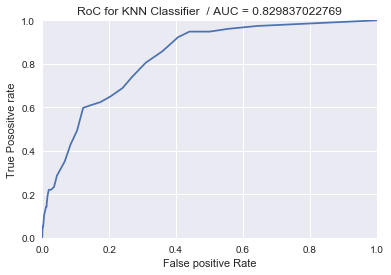

In [20]:
#ROC of KNN
knn_auc=plotRoc(knn_clf,X,Y,string="KNN")

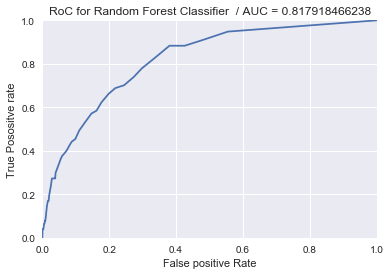

In [21]:
#ROC of KNN
rf_auc=plotRoc(rf_clf,X,Y,string="Random Forest")

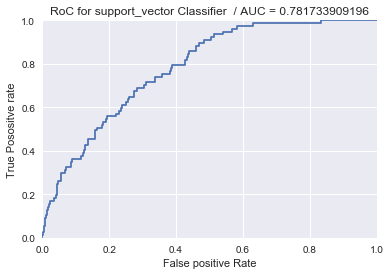

In [22]:
#ROC of support vector
svc_auc=plotRoc(svc_clf,X,Y,string="support_vector")

In [23]:
#Showing AUC of all 3 classifiers in tabular form
auc_df=pand.DataFrame({'classifier':['KNN','Random_Forest','Support_vec'],'AUC_Values':[knn_auc,rf_auc,svc_auc]
                        }, 
                          columns=['classifier','AUC_Values'])
auc_df.head()

,classifier,AUC_Values
0,KNN,0.829837
1,Random_Forest,0.817918
2,Support_vec,0.781734


In [24]:
svc_bp=svc_bestparam
bestPars=pand.DataFrame({'classifier':['KNN','Random_Forest','Support_vec'],'Best_parameters':[bestK,bestN,str(svc_bp)],
                         'accuracy':[max(knn_accuracy),max(rf_accuracy),svc_accuracy]}, 
                          columns=['classifier','Best_parameters','accuracy'])

In [25]:
bestPars

,classifier,Best_parameters,accuracy
0,KNN,31,0.957848
1,Random_Forest,40,0.957848
2,Support_vec,"{'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}",0.957293


In [26]:
def K_fold(k,classifier,X,Y,string):
    crossVScore=cross_val_score(classifier,X,Y,cv=k,scoring="accuracy").mean()
    print string+' cross_validation_score = '+str(crossVScore)
    return crossVScore

In [27]:
svcprm=svc_bestparam
#running 10 fold cross validation on each classifier 
#1: first redefine classifiers using best parameters
best_knn_clf = KNeighborsClassifier(n_neighbors=bestK)
best_rf_clf=RandomForestClassifier(n_estimators=bestN)
best_svc_clf=svm.SVC(kernel=svcprm['kernel'],C=svcprm['C'],gamma=svcprm['gamma'],decision_function_shape='ovo',probability=True)


In [28]:
#2: pass these new classifiers to the K_fold evaluator
knnCVS=K_fold(10,best_knn_clf,X,Y,string="KNN")
rfCVS=K_fold(10,best_rf_clf,X,Y,string="random_Forest")
svcCVS=K_fold(10,best_svc_clf,X,Y, string="Support_Vector")

KNN cross_validation_score = 0.949734787168
random_Forest cross_validation_score = 0.947169901457
Support_Vector cross_validation_score = 0.950000352416


In [29]:
#k fold cross validation
clf_arr=[best_knn_clf,best_rf_clf,best_svc_clf]
def kfold_eval_IMB(clf,X,Y):
    kfold=KFold(n_splits=10)
    accuracy=[]
    precision=[]
    F1=[]
    recall=[]
    AUC=[]
    #slipt generates indices to split data into training and test set
    #using x.values instead of X bcos of indexing error from pandas dataframe to numpy
    #split(x) in pandas expectss column indices but we dealing with row indices
    for trn_index,tst_index in kfold.split(X.values,Y.values):
        pipe=make_pipeline(clf)
        xx_train,xx_test=X.values[trn_index],X.values[tst_index]
        yy_train,yy_test=Y.values[trn_index],Y.values[tst_index]
        pipe.fit(xx_train,yy_train)
        predxn=pipe.predict(xx_test)

        precision.append(metrics.precision_score(yy_test,predxn))
        accuracy.append(metrics.accuracy_score(yy_test,predxn))
        recall.append(metrics.recall_score(yy_test,predxn))
        F1.append(metrics.f1_score(yy_test,predxn))
        AUC.append(metrics.roc_auc_score(yy_test,predxn))

    prec_m=np.mean(precision)
    recl_m=np.mean(recall)
    f1_m=np.mean(F1)
    acc_m=np.mean(accuracy)
    auc_m=np.mean(AUC)

    kf_mean=pand.DataFrame({'kfold_precision':[prec_m],'kfold_accuracy':[acc_m],'kfold_recall':[recl_m],
                                 'kfold_f1':[f1_m],'kfold_Auc':[auc_m]})
    return kf_mean           

In [30]:
#peforming cross_validation and evaluation on imbalanced data
imbknn_kf_means=kfold_eval_IMB(best_knn_clf,X,Y)
imbrf_kf_means=kfold_eval_IMB(best_rf_clf,X,Y)
imbsvc_kf_means=kfold_eval_IMB(best_svc_clf,X,Y)

C:\Users\ITECH\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ITECH\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
print 'CROSS-VAL REPORT FOR KNN BEFORE BALANCING'
imbknn_kf_means

CROSS-VAL REPORT FOR KNN BEFORE BALANCING


,kfold_Auc,kfold_accuracy,kfold_f1,kfold_precision,kfold_recall
0,0.50105,0.949823,0.004651,0.1,0.002381


In [32]:
print 'CROSS-VAL REPORT FOR RANDOM FOREST BEFORE BALANCING'
imbrf_kf_means

CROSS-VAL REPORT FOR RANDOM FOREST BEFORE BALANCING


,kfold_Auc,kfold_accuracy,kfold_f1,kfold_precision,kfold_recall
0,0.505207,0.946726,0.026802,0.208333,0.014618


In [33]:
print 'CROSS-VAL REPORT FOR SUPPORT VECTOR BEFORE BALANCING'
imbsvc_kf_means

CROSS-VAL REPORT FOR SUPPORT VECTOR BEFORE BALANCING


,kfold_Auc,kfold_accuracy,kfold_f1,kfold_precision,kfold_recall
0,0.5,0.95,0.0,0.0,0.0


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import KFold

In [35]:
#k fold cross validation
def kfold_Eval_Bal(clf,X,Y):
    kfold=KFold(n_splits=10)
    accuracy=[]
    precision=[]
    F1=[]
    recall=[]
    AUC=[]
    #slipt generates indices to split data into training and test set
    #using x.values instead of X bcos of indexing error from pandas dataframe to numpy
    #split(x) in pandas expectss column indices but we dealing with row indices
    for trn_index,tst_index in kfold.split(X.values,Y.values):
        xx_train,xx_test=X.values[trn_index],X.values[tst_index]
        yy_train,yy_test=Y.values[trn_index],Y.values[tst_index]
        #creating SMOTE to balance data
        sm=SMOTE()
        #the fit_sample returns the resampled/balanced data set.
        xx_resTrain,yy_resTrain=sm.fit_sample(xx_train,yy_train)
         
        clfpipe=make_pipeline(clf)
        clfpipe.fit(xx_resTrain,yy_resTrain)
        smtpredxn=clfpipe.predict(xx_test)

        precision.append(metrics.precision_score(yy_test,smtpredxn))
        accuracy.append(metrics.accuracy_score(yy_test,smtpredxn))
        recall.append(metrics.recall_score(yy_test,smtpredxn))
        F1.append(metrics.f1_score(yy_test,smtpredxn))
        AUC.append(metrics.roc_auc_score(yy_test,smtpredxn))

    prec_m=np.mean(precision)
    recl_m=np.mean(recall)
    f1_m=np.mean(F1)
    acc_m=np.mean(accuracy)
    auc_m=np.mean(AUC)

    smtkf_mean=pand.DataFrame({'kfold_precision':[prec_m],'kfold_accuracy':[acc_m],'kfold_recall':[recl_m],
                                 'kfold_f1':[f1_m],'kfold_Auc':[auc_m]})
    return smtkf_mean                  

In [36]:
#peforming cross_validation and evaluation on imbalanced data
balknn_kf_means=kfold_Eval_Bal(best_knn_clf,X,Y)
balrf_kf_means=kfold_Eval_Bal(best_rf_clf,X,Y)


In [37]:
print 'CROSS-VAL REPORT FOR KNN AFTER BALANCING'
balknn_kf_means

CROSS-VAL REPORT FOR KNN AFTER BALANCING


,kfold_Auc,kfold_accuracy,kfold_f1,kfold_precision,kfold_recall
0,0.689533,0.714248,0.18734,0.110666,0.662412


In [38]:
print 'CROSS_VAL REPORT FOR RANDOM FOREST AFTER BALANCING'
balrf_kf_means

CROSS_VAL REPORT FOR RANDOM FOREST AFTER BALANCING


,kfold_Auc,kfold_accuracy,kfold_f1,kfold_precision,kfold_recall
0,0.594992,0.874513,0.179985,0.1372,0.284592


In [39]:
#Support vector takes a long time to finish
balsvc_kf_means=kfold_Eval_Bal(best_svc_clf,X,Y)

In [40]:
print 'CROSS-VAL REPORT FOR SUPPORT VECTOR AFTER BALANCING'
balsvc_kf_means

CROSS-VAL REPORT FOR SUPPORT VECTOR AFTER BALANCING


,kfold_Auc,kfold_accuracy,kfold_f1,kfold_precision,kfold_recall
0,0.706396,0.465133,0.153431,0.083978,0.974335


In [44]:
#REDRAWING OF ROC AFTER BALANCING
def plotRoc_Bal(classifier,X,Y,string):
    #splitting datasets
    x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.1595, random_state=4)
    #creating SMOTE to balance data
    sm=SMOTE()
    #the fit_sample returns the resampled/balanced data set.
    x_resTrain,y_resTrain=sm.fit_sample(x_train,y_train)
    clfpipe=make_pipeline(classifier)
    clfpipe.fit(x_resTrain,y_resTrain)
    smote_pred=clfpipe.predict(x_test)
    plt.rcParams['font.size']=12
    #Step 2: calling the roc curve function to return 3 values
        #the 3 values are: Falsepositive, truepositive, thresholds
    falsePositives, truePositives, thresholds=metrics.roc_curve(y_test,smote_pred)
    
    #computing AUC
    aucscore=metrics.roc_auc_score(y_test,smote_pred)
    
    #step 3:Plotting
    plt.plot(falsePositives,truePositives)
    plt.xlim(0,1)
    plt.ylim([0.0,1.0])
    plt.title('RoC for '+ string+' after Balance '+' / AUC = '+ str(aucscore))
    plt.xlabel('False positive Rate')
    plt.ylabel('True Posositve rate')
    plt.grid(True)

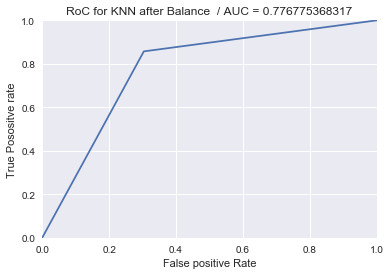

In [45]:
plotRoc_Bal(best_knn_clf,X,Y,string="KNN")

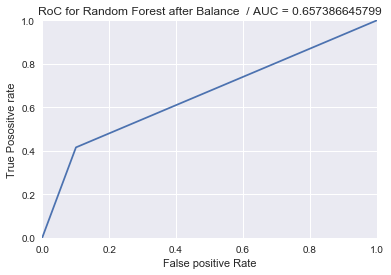

In [46]:
plotRoc_Bal(best_rf_clf,X,Y,string="Random Forest")

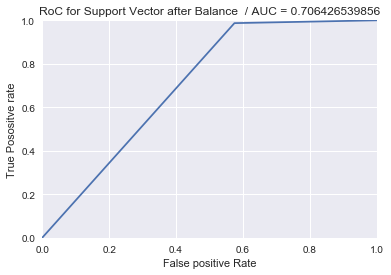

In [47]:
plotRoc_Bal(best_svc_clf,X,Y,string="Support Vector")